## Iris Flower Classification Demonstration

#### Python library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#### Reading data

This data is taken from:
https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
iris_data = pd.read_csv("iris.data")

In [3]:
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data = pd.read_csv("iris.data", names=["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"])

In [5]:
iris_data

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Understanding the data

![Types of Iris Flowers](iris-types.png)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris_data.tail(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
iris_data.sample(15)

,sepal_len,sepal_wid,petal_len,petal_wid,class
59,5.2,2.7,3.9,1.4,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
67,5.8,2.7,4.1,1.0,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


#### Handle Missing Values & Duplicates (If applicable)

In [12]:
iris_data.drop_duplicates()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris_data

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
iris_data.drop_duplicates(inplace=True)

In [15]:
iris_data

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Class Balance

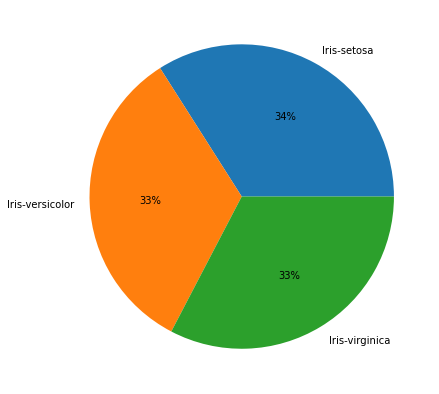

In [16]:
iris_class_count = iris_data["class"].value_counts()

plt.figure(figsize=[7, 7])
plt.pie(iris_class_count, labels=iris_data["class"].unique(), autopct='%.0f%%');

#### Data Split (Training, Validation, Testing)

In [17]:
X = iris_data.drop("class", axis=1)
y = iris_data["class"]

In [18]:
X

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 147, dtype: object

![data-split](imgs/training-validation-test.png)

In [20]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, shuffle=True)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, shuffle=True)

#### Model Training & Metrics

K-Nearst Neighbors Model

![1](1570113093624.gif)

![](imgs/1570113093624.gif)

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train.values, y_train.values)

KNeighborsClassifier()

In [22]:
y_valid_pred = knn_model.predict(X_valid.values)

accuracy_score(y_valid, y_valid_pred)

0.896551724137931

Logistic Regression Model

![log_reg](Logistic-curve.jpg)

In [23]:
logreg_model = LogisticRegression()

logreg_model.fit(X_train.values, y_train.values)

LogisticRegression()

In [24]:
y_valid_pred = logreg_model.predict(X_valid.values)

accuracy_score(y_valid, y_valid_pred)

0.896551724137931

#### Model Testing

In [25]:
X_train_final = pd.concat([X_train, X_valid])
y_train_final = pd.concat([y_train, y_valid])

In [26]:
logreg_test = LogisticRegression()

logreg_test.fit(X_train_final.values, y_train_final.values)

LogisticRegression()

In [27]:
y_pred = logreg_test.predict(X_test.values)

accuracy_score(y_test, y_pred)

0.9333333333333333